CO

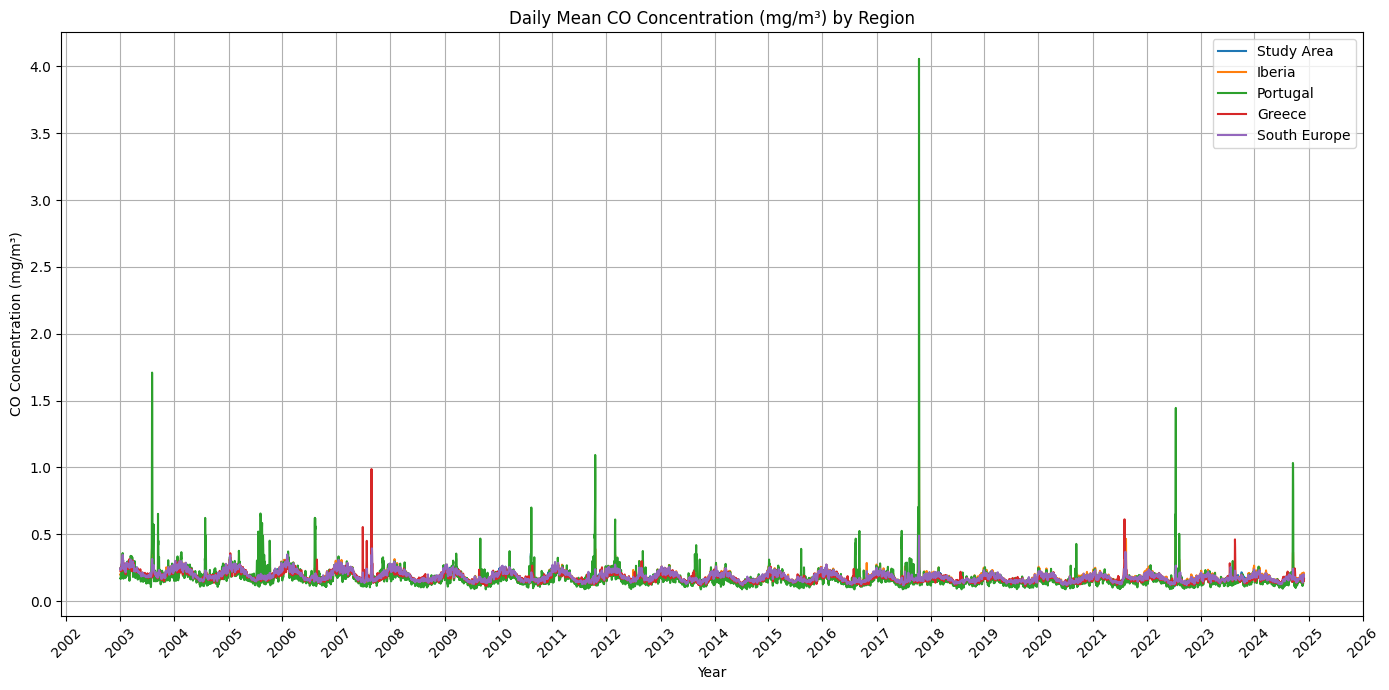

In [1]:
#Time series study area, iberia, greece, portugal, south europe with daily averages

import xarray as xr
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import matplotlib.dates as mdates

# Load the NetCDF file
file_path = r"E:\IPMA\CAMS\chem_multlvl\daily_co_stats.nc"
ds = xr.open_dataset(file_path)

# Define regions: (lat_min, lat_max, lon_min, lon_max)
regions = {
    "Study Area": (34, 66, -12, 36),
    "Iberia": (35, 45, -10, 5),
    "Portugal": (36, 43, -10, -6),
    "Greece": (34, 42, 19, 29),
    "South Europe": (34, 45, -10, 29),
}

# Stack Year, Month, Day into a single dimension
co = ds['Mean'].stack(time=('Year', 'Month', 'Day'))

# Build datetime index from stacked coordinates
year = co['Year'].values
month = co['Month'].values
day = co['Day'].values

# Create datetime objects, filter out invalid ones
dates = []
valid_indices = []

for i in range(len(year)):
    try:
        dt = pd.Timestamp(year=int(year[i]), month=int(month[i]), day=int(day[i]))
        dates.append(dt)
        valid_indices.append(i)
    except ValueError:
        # Skip invalid dates
        continue

# Select only valid entries
co = co.isel(time=valid_indices)

# Dictionary to store time series for each region
region_series = {}

for name, (lat_min, lat_max, lon_min, lon_max) in regions.items():
    subset = co.sel(latitude=slice(lat_min, lat_max), longitude=slice(lon_min, lon_max))
    regional_mean = subset.mean(dim=['latitude', 'longitude'])
    region_series[name] = pd.Series(regional_mean.values, index=pd.DatetimeIndex(dates))

# Plotting
plt.figure(figsize=(14, 7))

for name, series in region_series.items():
    plt.plot(series.index, series, label=name)

plt.title('Daily Mean CO Concentration (mg/m³) by Region')
plt.xlabel('Year')
plt.ylabel('CO Concentration (mg/m³)')
plt.grid(True)
plt.legend()

# Format x-axis to show every year
ax = plt.gca()
ax.xaxis.set_major_locator(mdates.YearLocator(1))  # One tick per year
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
plt.xticks(rotation=45)  # Optional: tilt labels for readability

plt.tight_layout()
plt.show()

In [ ]:
#Boxplot variability by month for every year

import xarray as xr
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# File path
file_path = r"E:\IPMA\CAMS\chem_multlvl\daily_co_stats.nc"
ds = xr.open_dataset(file_path)

# Month names
month_names = ["Jan", "Feb", "Mar", "Apr", "May", "Jun",
               "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"]

# Define regions: (lat_min, lat_max, lon_min, lon_max)
regions = {
    "Study Area": (34, 66, -12, 36),
    "Iberia": (35, 45, -10, 5),
    "Portugal": (36, 43, -10, -6),
    "Greece": (34, 42, 19, 29),
    "South Europe": (34, 45, -10, 29),
}

# Loop through each region
for region_name, (lat_min, lat_max, lon_min, lon_max) in regions.items():
    # Subset the dataset to the region
    region_ds = ds.sel(latitude=slice(lat_min, lat_max), longitude=slice(lon_min, lon_max))

    # Extract the 'Mean' variable and stack space dimensions
    mean_data = region_ds['Mean'].stack(space=('latitude', 'longitude'))  # (Year, Month, Day, space)

    # Prepare DataFrame for boxplot
    all_data = []

    for month in range(1, 13):
        month_data = mean_data.sel(Month=month).values  # shape: (Year, Day, space)
        flat = month_data.reshape(-1)
        flat = flat[~np.isnan(flat)]

        all_data.append(pd.DataFrame({
            "Month": [month_names[month - 1]] * len(flat),  # Use name
            "Value": flat
        }))

    df = pd.concat(all_data, ignore_index=True)

    # Set month order
    df["Month"] = pd.Categorical(df["Month"], categories=month_names, ordered=True)

    # Plot
    plt.figure(figsize=(12, 6))
    sns.boxplot(x="Month", y="Value", data=df, showfliers=False, whis=1.5)
    plt.title(f"Monthly Variability of Daily Mean CO Concentration\n{region_name}")
    plt.xlabel("Month")
    plt.ylabel("CO Concentration (mg/m³)")
    plt.grid(True)
    plt.tight_layout()
    plt.show()


NO2

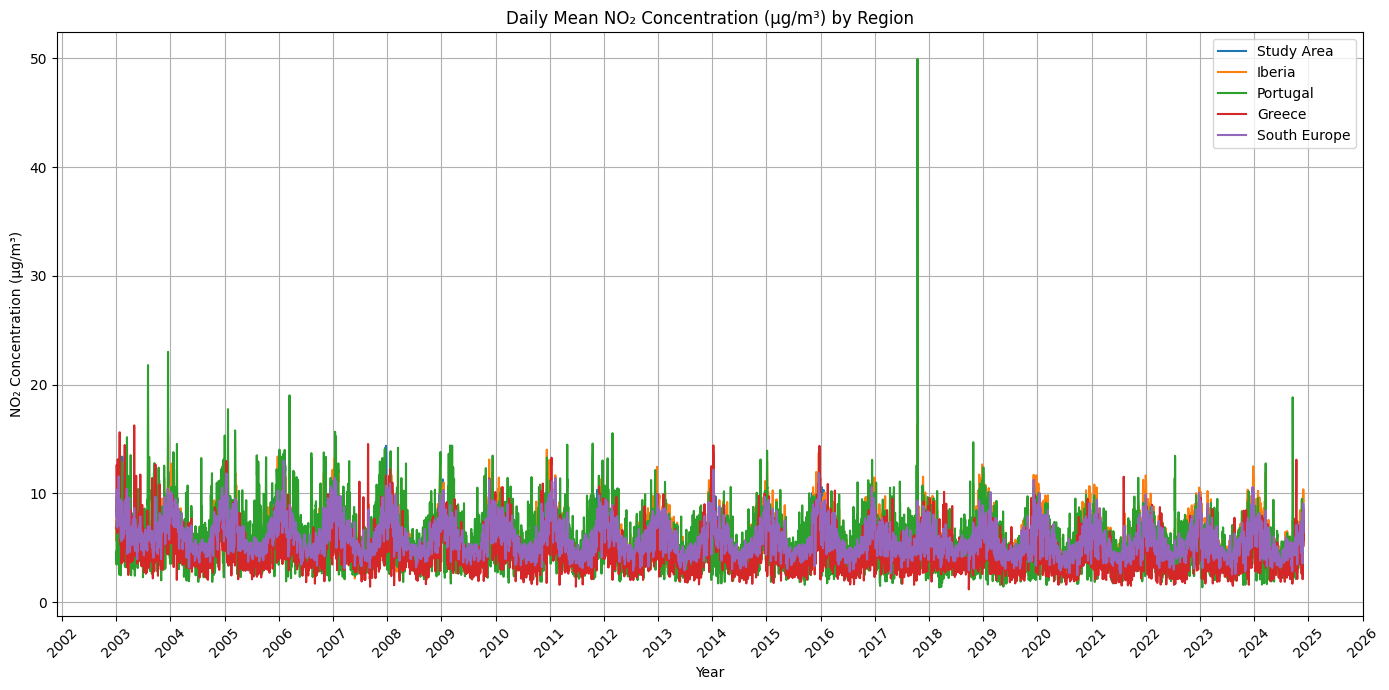

In [3]:
#Time series study area, iberia, greece, portugal, south europe with daily averages

import xarray as xr
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import matplotlib.dates as mdates

# Load the NetCDF file for NO2
file_path = r"E:\IPMA\CAMS\chem_multlvl\daily_no2_stats.nc" 
ds = xr.open_dataset(file_path)

# Define regions: (lat_min, lat_max, lon_min, lon_max)
regions = {
    "Study Area": (34, 66, -12, 36),
    "Iberia": (35, 45, -10, 5),
    "Portugal": (36, 43, -10, -6),
    "Greece": (34, 42, 19, 29),
    "South Europe": (34, 45, -10, 29),
}

# Stack Year, Month, Day into a single dimension
no2 = ds['Mean'].stack(time=('Year', 'Month', 'Day'))

# Build datetime index from stacked coordinates
year = no2['Year'].values
month = no2['Month'].values
day = no2['Day'].values

# Create datetime objects, filter out invalid ones
dates = []
valid_indices = []

for i in range(len(year)):
    try:
        dt = pd.Timestamp(year=int(year[i]), month=int(month[i]), day=int(day[i]))
        dates.append(dt)
        valid_indices.append(i)
    except ValueError:
        continue

# Select only valid entries
no2 = no2.isel(time=valid_indices)

# Dictionary to store time series for each region
region_series = {}

for name, (lat_min, lat_max, lon_min, lon_max) in regions.items():
    subset = no2.sel(latitude=slice(lat_min, lat_max), longitude=slice(lon_min, lon_max))
    regional_mean = subset.mean(dim=['latitude', 'longitude'])
    region_series[name] = pd.Series(regional_mean.values, index=pd.DatetimeIndex(dates))

# Plotting
plt.figure(figsize=(14, 7))

for name, series in region_series.items():
    plt.plot(series.index, series, label=name)

plt.title('Daily Mean NO₂ Concentration (µg/m³) by Region')
plt.xlabel('Year')
plt.ylabel('NO₂ Concentration (µg/m³)')
plt.grid(True)
plt.legend()
# Format x-axis to show every year
ax = plt.gca()
ax.xaxis.set_major_locator(mdates.YearLocator(1))  # One tick per year
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
plt.xticks(rotation=45)  # Optional: tilt labels for readability

plt.tight_layout()
plt.show()

In [ ]:
#Boxplot variability by month for every year

import xarray as xr
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# File path
file_path = r"E:\IPMA\CAMS\chem_multlvl\daily_no2_stats.nc"
ds = xr.open_dataset(file_path)

# Month names
month_names = ["Jan", "Feb", "Mar", "Apr", "May", "Jun",
               "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"]

# Define regions: (lat_min, lat_max, lon_min, lon_max)
regions = {
    "Study Area": (34, 66, -12, 36),
    "Iberia": (35, 45, -10, 5),
    "Portugal": (36, 43, -10, -6),
    "Greece": (34, 42, 19, 29),
    "South Europe": (34, 45, -10, 29),
}

# Loop through each region
for region_name, (lat_min, lat_max, lon_min, lon_max) in regions.items():
    # Subset the dataset to the region
    region_ds = ds.sel(latitude=slice(lat_min, lat_max), longitude=slice(lon_min, lon_max))

    # Extract the 'Mean' variable and stack space dimensions
    mean_data = region_ds['Mean'].stack(space=('latitude', 'longitude'))  # (Year, Month, Day, space)

    # Prepare DataFrame for boxplot
    all_data = []

    for month in range(1, 13):
        month_data = mean_data.sel(Month=month).values  # shape: (Year, Day, space)
        flat = month_data.reshape(-1)
        flat = flat[~np.isnan(flat)]

        all_data.append(pd.DataFrame({
            "Month": [month_names[month - 1]] * len(flat),  # Use name
            "Value": flat
        }))

    df = pd.concat(all_data, ignore_index=True)

    # Set month order
    df["Month"] = pd.Categorical(df["Month"], categories=month_names, ordered=True)

    # Plot
    plt.figure(figsize=(12, 6))
    sns.boxplot(x="Month", y="Value", data=df, showfliers=False, whis=1.5)
    plt.title(f"Monthly Variability of Daily Mean NO₂ Concentration\n{region_name}")
    plt.xlabel("Month")
    plt.ylabel("NO₂ Concentration (µg/m³)")
    plt.grid(True)
    plt.tight_layout()
    plt.show()


NO

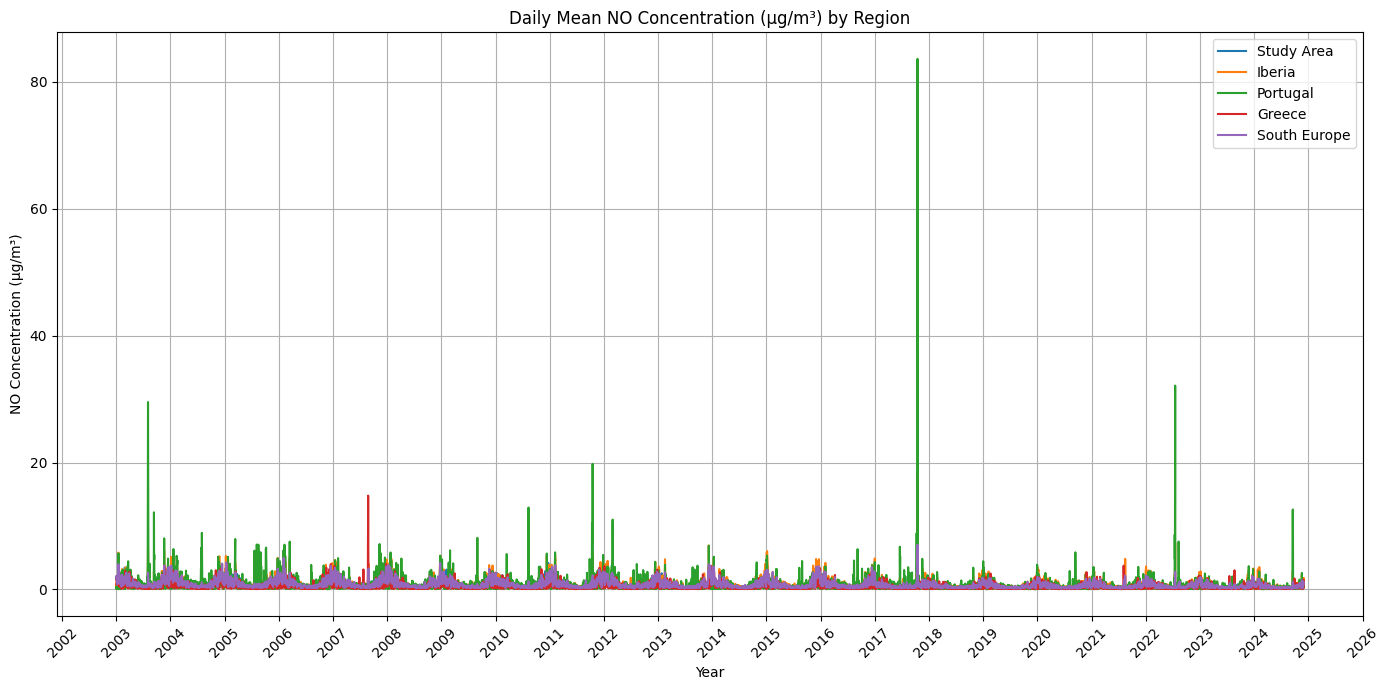

In [4]:
#Time series study area, iberia, greece, portugal, south europe with daily averages

import xarray as xr
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import matplotlib.dates as mdates

# Load the NetCDF file for NO
file_path = r"E:\IPMA\CAMS\chem_multlvl\daily_no_stats.nc" 
ds = xr.open_dataset(file_path)

# Define regions: (lat_min, lat_max, lon_min, lon_max)
regions = {
    "Study Area": (34, 66, -12, 36),
    "Iberia": (35, 45, -10, 5),
    "Portugal": (36, 43, -10, -6),
    "Greece": (34, 42, 19, 29),
    "South Europe": (34, 45, -10, 29),
}

# Stack Year, Month, Day into a single dimension
no = ds['Mean'].stack(time=('Year', 'Month', 'Day'))

# Build datetime index from stacked coordinates
year = no['Year'].values
month = no['Month'].values
day = no['Day'].values

# Create datetime objects, filter out invalid ones
dates = []
valid_indices = []

for i in range(len(year)):
    try:
        dt = pd.Timestamp(year=int(year[i]), month=int(month[i]), day=int(day[i]))
        dates.append(dt)
        valid_indices.append(i)
    except ValueError:
        continue

# Select only valid entries
no = no.isel(time=valid_indices)

# Dictionary to store time series for each region
region_series = {}

for name, (lat_min, lat_max, lon_min, lon_max) in regions.items():
    subset = no.sel(latitude=slice(lat_min, lat_max), longitude=slice(lon_min, lon_max))
    regional_mean = subset.mean(dim=['latitude', 'longitude'])
    region_series[name] = pd.Series(regional_mean.values, index=pd.DatetimeIndex(dates))

# Plotting
plt.figure(figsize=(14, 7))

for name, series in region_series.items():
    plt.plot(series.index, series, label=name)

plt.title('Daily Mean NO Concentration (µg/m³) by Region')
plt.xlabel('Year')
plt.ylabel('NO Concentration (µg/m³)')
plt.grid(True)
plt.legend()
# Format x-axis to show every year
ax = plt.gca()
ax.xaxis.set_major_locator(mdates.YearLocator(1))  # One tick per year
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
plt.xticks(rotation=45)  # Optional: tilt labels for readability

plt.tight_layout()
plt.show()


In [ ]:
#Boxplot variability by month for every year

import xarray as xr
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# File path
file_path = r"E:\IPMA\CAMS\chem_multlvl\daily_no_stats.nc"
ds = xr.open_dataset(file_path)

# Month names
month_names = ["Jan", "Feb", "Mar", "Apr", "May", "Jun",
               "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"]

# Define regions: (lat_min, lat_max, lon_min, lon_max)
regions = {
    "Study Area": (34, 66, -12, 36),
    "Iberia": (35, 45, -10, 5),
    "Portugal": (36, 43, -10, -6),
    "Greece": (34, 42, 19, 29),
    "South Europe": (34, 45, -10, 29),
}

# Loop through each region
for region_name, (lat_min, lat_max, lon_min, lon_max) in regions.items():
    # Subset the dataset to the region
    region_ds = ds.sel(latitude=slice(lat_min, lat_max), longitude=slice(lon_min, lon_max))

    # Extract the 'Mean' variable and stack space dimensions
    mean_data = region_ds['Mean'].stack(space=('latitude', 'longitude'))  # (Year, Month, Day, space)

    # Prepare DataFrame for boxplot
    all_data = []

    for month in range(1, 13):
        month_data = mean_data.sel(Month=month).values  # shape: (Year, Day, space)
        flat = month_data.reshape(-1)
        flat = flat[~np.isnan(flat)]

        all_data.append(pd.DataFrame({
            "Month": [month_names[month - 1]] * len(flat),  # Use name
            "Value": flat
        }))

    df = pd.concat(all_data, ignore_index=True)

    # Set month order
    df["Month"] = pd.Categorical(df["Month"], categories=month_names, ordered=True)

    # Plot
    plt.figure(figsize=(12, 6))
    sns.boxplot(x="Month", y="Value", data=df, showfliers=False, whis=1.5)
    plt.title(f"Monthly Variability of Daily Mean NO Concentration\n{region_name}")
    plt.xlabel("Month")
    plt.ylabel("NO Concentration (µg/m³)")
    plt.grid(True)
    plt.tight_layout()
    plt.show()


O3

In [ ]:
#Time series study area, iberia, greece, portugal, south europe with daily averages NEEDS TO BE REVISED BECAUSE OF THE WAY IT IS SHOWED IN WHO VALUES

import xarray as xr
import matplotlib.pyplot as plt
import os

# Set folder and file pattern
data_folder = r"E:\IPMA\CAMS\chem_multlvl\5compile_2003_2024"
file_pattern = os.path.join(data_folder, "CAMS_global_reanalysis_EAC4_chem_multlvl_20*.nc")

# Load all NetCDF files as one dataset
ds = xr.open_mfdataset(file_pattern, combine='by_coords')

# O3 variable
o3_data = ds['go3']

# Define your regions: (lat_min, lat_max, lon_min, lon_max)
regions = {
    "Study Area": (34, 66, -12, 36),
    "Iberia": (35, 45, -10, 5),
    "Portugal": (36, 43, -10, -6),
    "Greece": (34, 42, 19, 29),
    "South Europe": (34, 45, -10, 29),
}

# Create plot
plt.figure(figsize=(14, 6))

for name, (lat_min, lat_max, lon_min, lon_max) in regions.items():
    # Subset and spatial average
    o3_region = o3_data.sel(
        latitude=slice(lat_max, lat_min),  # descending latitude
        longitude=slice(lon_min, lon_max)
    ).mean(dim=["latitude", "longitude"])

    # Compute daily means from 3-hourly data
    o3_daily_mean = o3_region.resample(time="1D").mean(skipna=True)

    # Plot daily mean data
    plt.plot(o3_daily_mean['time'], o3_daily_mean, label=name, linewidth=0.8)

# Final plot formatting
plt.title("Daily Mean O3 Concentration Time Series (µg/m³) by European Region")
plt.xlabel("Time")
plt.ylabel("O3 Concentration (µg/m³)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


PM2.5

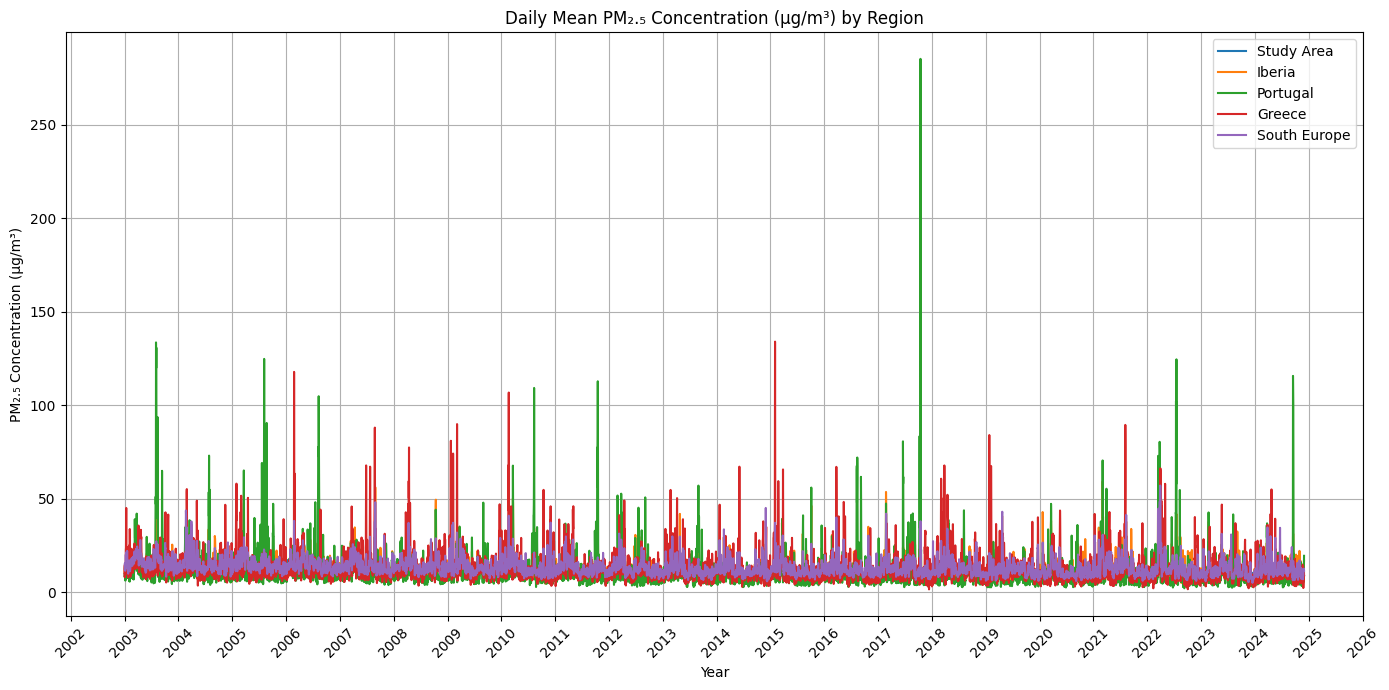

In [5]:
#Time series study area, iberia, greece, portugal, south europe with daily averages

import xarray as xr
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import matplotlib.dates as mdates

# Load the NetCDF file for PM2.5
file_path = r"E:\IPMA\CAMS\chem_singlvl\daily_pm2p5_stats.nc"
ds = xr.open_dataset(file_path)

# Define regions: (lat_min, lat_max, lon_min, lon_max)
regions = {
    "Study Area": (34, 66, -12, 36),
    "Iberia": (35, 45, -10, 5),
    "Portugal": (36, 43, -10, -6),
    "Greece": (34, 42, 19, 29),
    "South Europe": (34, 45, -10, 29),
}

# Stack Year, Month, Day into a single dimension
pm2p5 = ds['Mean'].stack(time=('Year', 'Month', 'Day'))

# Build datetime index from stacked coordinates
year = pm2p5['Year'].values
month = pm2p5['Month'].values
day = pm2p5['Day'].values

# Create datetime objects, filter out invalid ones
dates = []
valid_indices = []

for i in range(len(year)):
    try:
        dt = pd.Timestamp(year=int(year[i]), month=int(month[i]), day=int(day[i]))
        dates.append(dt)
        valid_indices.append(i)
    except ValueError:
        continue

# Select only valid entries
pm2p5 = pm2p5.isel(time=valid_indices)

# Dictionary to store time series for each region
region_series = {}

for name, (lat_min, lat_max, lon_min, lon_max) in regions.items():
    subset = pm2p5.sel(latitude=slice(lat_min, lat_max), longitude=slice(lon_min, lon_max))
    regional_mean = subset.mean(dim=['latitude', 'longitude'])
    region_series[name] = pd.Series(regional_mean.values, index=pd.DatetimeIndex(dates))

# Plotting
plt.figure(figsize=(14, 7))

for name, series in region_series.items():
    plt.plot(series.index, series, label=name)

plt.title('Daily Mean PM₂.₅ Concentration (µg/m³) by Region')
plt.xlabel('Year')
plt.ylabel('PM₂.₅ Concentration (µg/m³)')
plt.grid(True)
plt.legend()
# Format x-axis to show every year
ax = plt.gca()
ax.xaxis.set_major_locator(mdates.YearLocator(1))  # One tick per year
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
plt.xticks(rotation=45)  # Optional: tilt labels for readability

plt.tight_layout()
plt.show()


In [ ]:
#Boxplot variability by month for every year

import xarray as xr
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# File path
file_path = r"E:\IPMA\CAMS\chem_singlvl\daily_pm2p5_stats.nc"
ds = xr.open_dataset(file_path)

# Month names
month_names = ["Jan", "Feb", "Mar", "Apr", "May", "Jun",
               "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"]

# Define regions: (lat_min, lat_max, lon_min, lon_max)
regions = {
    "Study Area": (34, 66, -12, 36),
    "Iberia": (35, 45, -10, 5),
    "Portugal": (36, 43, -10, -6),
    "Greece": (34, 42, 19, 29),
    "South Europe": (34, 45, -10, 29),
}

# Loop through each region
for region_name, (lat_min, lat_max, lon_min, lon_max) in regions.items():
    # Subset the dataset to the region
    region_ds = ds.sel(latitude=slice(lat_min, lat_max), longitude=slice(lon_min, lon_max))

    # Extract the 'Mean' variable and stack space dimensions
    mean_data = region_ds['Mean'].stack(space=('latitude', 'longitude'))  # (Year, Month, Day, space)

    # Prepare DataFrame for boxplot
    all_data = []

    for month in range(1, 13):
        month_data = mean_data.sel(Month=month).values  # shape: (Year, Day, space)
        flat = month_data.reshape(-1)
        flat = flat[~np.isnan(flat)]

        all_data.append(pd.DataFrame({
            "Month": [month_names[month - 1]] * len(flat),  # Use name
            "Value": flat
        }))

    df = pd.concat(all_data, ignore_index=True)

    # Set month order
    df["Month"] = pd.Categorical(df["Month"], categories=month_names, ordered=True)

    # Plot
    plt.figure(figsize=(12, 6))
    sns.boxplot(x="Month", y="Value", data=df, showfliers=False, whis=1.5)
    plt.title(f"Monthly Variability of Daily Mean PM₂.₅ Concentration\n{region_name}")
    plt.xlabel("Month")
    plt.ylabel("PM₂.₅ Concentration (µg/m³)")
    plt.grid(True)
    plt.tight_layout()
    plt.show()


PM10

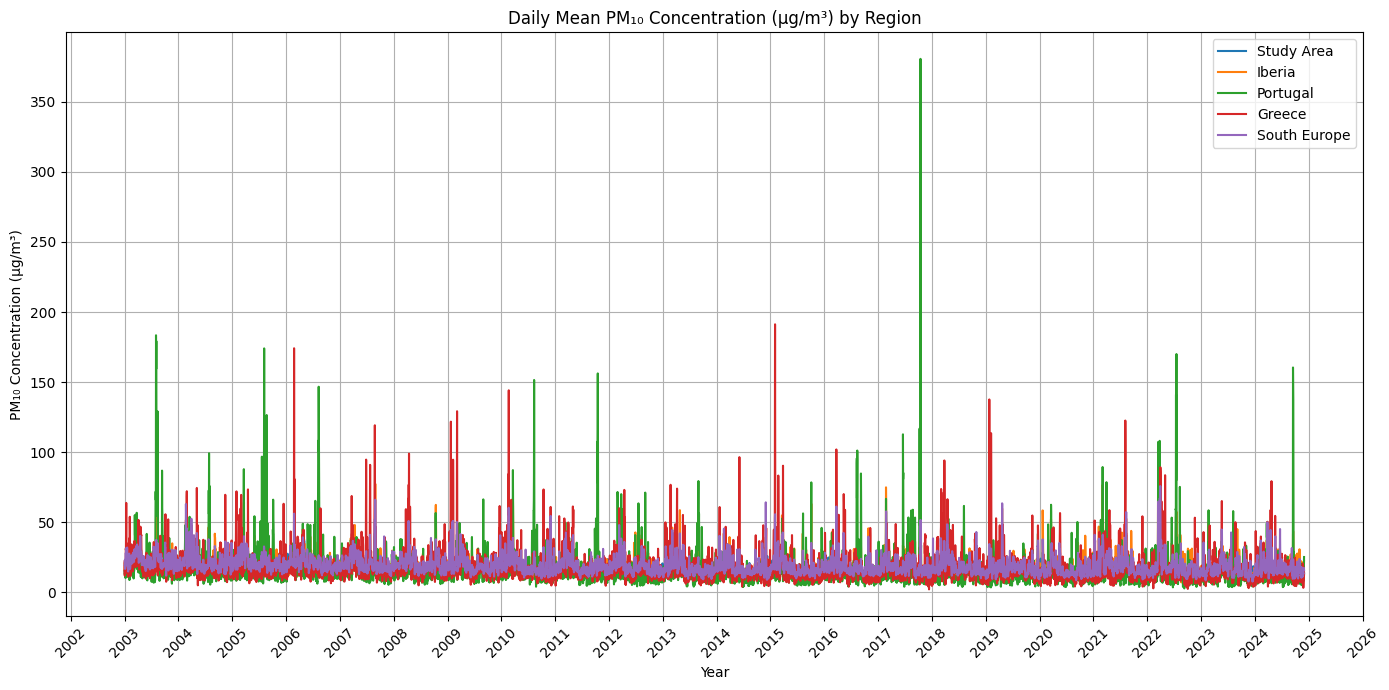

In [6]:
#Time series study area, iberia, greece, portugal, south europe with daily averages

import xarray as xr
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import matplotlib.dates as mdates

# Load the NetCDF file for PM10
file_path = r"E:\IPMA\CAMS\chem_singlvl\daily_pm10_stats.nc"
ds = xr.open_dataset(file_path)

# Define regions: (lat_min, lat_max, lon_min, lon_max)
regions = {
    "Study Area": (34, 66, -12, 36),
    "Iberia": (35, 45, -10, 5),
    "Portugal": (36, 43, -10, -6),
    "Greece": (34, 42, 19, 29),
    "South Europe": (34, 45, -10, 29),
}

# Stack Year, Month, Day into a single dimension
pm10 = ds['Mean'].stack(time=('Year', 'Month', 'Day'))

# Build datetime index from stacked coordinates
year = pm10['Year'].values
month = pm10['Month'].values
day = pm10['Day'].values

# Create datetime objects, filter out invalid ones
dates = []
valid_indices = []

for i in range(len(year)):
    try:
        dt = pd.Timestamp(year=int(year[i]), month=int(month[i]), day=int(day[i]))
        dates.append(dt)
        valid_indices.append(i)
    except ValueError:
        continue

# Select only valid entries
pm10 = pm10.isel(time=valid_indices)

# Dictionary to store time series for each region
region_series = {}

for name, (lat_min, lat_max, lon_min, lon_max) in regions.items():
    subset = pm10.sel(latitude=slice(lat_min, lat_max), longitude=slice(lon_min, lon_max))
    regional_mean = subset.mean(dim=['latitude', 'longitude'])
    region_series[name] = pd.Series(regional_mean.values, index=pd.DatetimeIndex(dates))

# Plotting
plt.figure(figsize=(14, 7))

for name, series in region_series.items():
    plt.plot(series.index, series, label=name)

plt.title('Daily Mean PM₁₀ Concentration (µg/m³) by Region')
plt.xlabel('Year')
plt.ylabel('PM₁₀ Concentration (µg/m³)')
plt.grid(True)
plt.legend()
# Format x-axis to show every year
ax = plt.gca()
ax.xaxis.set_major_locator(mdates.YearLocator(1))  # One tick per year
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
plt.xticks(rotation=45)  # Optional: tilt labels for readability

plt.tight_layout()
plt.show()


In [ ]:
#Boxplot variability by month for every year

import xarray as xr
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# File path
file_path = r"E:\IPMA\CAMS\chem_singlvl\daily_pm10_stats.nc"
ds = xr.open_dataset(file_path)

# Month names
month_names = ["Jan", "Feb", "Mar", "Apr", "May", "Jun",
               "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"]

# Define regions: (lat_min, lat_max, lon_min, lon_max)
regions = {
    "Study Area": (34, 66, -12, 36),
    "Iberia": (35, 45, -10, 5),
    "Portugal": (36, 43, -10, -6),
    "Greece": (34, 42, 19, 29),
    "South Europe": (34, 45, -10, 29),
}

# Loop through each region
for region_name, (lat_min, lat_max, lon_min, lon_max) in regions.items():
    # Subset the dataset to the region
    region_ds = ds.sel(latitude=slice(lat_min, lat_max), longitude=slice(lon_min, lon_max))

    # Extract the 'Mean' variable and stack space dimensions
    mean_data = region_ds['Mean'].stack(space=('latitude', 'longitude'))  # (Year, Month, Day, space)

    # Prepare DataFrame for boxplot
    all_data = []

    for month in range(1, 13):
        month_data = mean_data.sel(Month=month).values  # shape: (Year, Day, space)
        flat = month_data.reshape(-1)
        flat = flat[~np.isnan(flat)]

        all_data.append(pd.DataFrame({
            "Month": [month_names[month - 1]] * len(flat),  # Use name
            "Value": flat
        }))

    df = pd.concat(all_data, ignore_index=True)

    # Set month order
    df["Month"] = pd.Categorical(df["Month"], categories=month_names, ordered=True)

    # Plot
    plt.figure(figsize=(12, 6))
    sns.boxplot(x="Month", y="Value", data=df, showfliers=False, whis=1.5)
    plt.title(f"Monthly Variability of Daily Mean PM₁₀ Concentration\n{region_name}")
    plt.xlabel("Month")
    plt.ylabel("PM₁₀ Concentration (µg/m³)")
    plt.grid(True)
    plt.tight_layout()
    plt.show()


Exceedances

In [ ]:
#MISSING ADDING O3

In [1]:
import xarray as xr
import numpy as np
import pandas as pd

# Define file paths and guide levels
files = {
    "CO":    ("E:/IPMA/CAMS/chem_multlvl/daily_co_stats.nc",   4),    # mg/m³
    "NO2":   ("E:/IPMA/CAMS/chem_multlvl/daily_no2_stats.nc", 25),    # µg/m³
    #"O3":    ("E:/IPMA/CAMS/chem_multlvl/daily_o3_stats.nc",  100),   # µg/m³
    "PM2.5": ("E:/IPMA/CAMS/chem_singlvl/daily_pm2p5_stats.nc", 15),  # µg/m³
    "PM10":  ("E:/IPMA/CAMS/chem_singlvl/daily_pm10_stats.nc", 45),   # µg/m³
}

# Define regions: (lat_min, lat_max, lon_min, lon_max)
regions = {
    "Study Area": (34, 66, -12, 36),
    "Iberia": (35, 45, -10, 5),
    "Portugal": (36, 43, -10, -6),
    "Greece": (34, 42, 19, 29),
    "South Europe": (34, 45, -10, 29),
}

# Initialize results
results = {region: {pollutant: 0 for pollutant in files} for region in regions}

# Process each pollutant
for pollutant, (path, limit) in files.items():
    print(f"Processing {pollutant}...")
    ds = xr.open_dataset(path)
    data = ds["Mean"]  # Shape: (Year, Month, Day, Lat, Lon)

    # Get lat/lon
    lats = ds.latitude
    lons = ds.longitude

    # Loop through regions
    for region, (lat_min, lat_max, lon_min, lon_max) in regions.items():
        lat_mask = (lats >= lat_min) & (lats <= lat_max)
        lon_mask = (lons >= lon_min) & (lons <= lon_max)

        sub_data = data.sel(latitude=lat_mask, longitude=lon_mask)
        
        # Exceedance count per day (True/False over space)
        exceed = sub_data > limit
        
        # Count how many days have any exceedance in the region
        daily_exceed = exceed.any(dim=["latitude", "longitude"])
        total_exceed = daily_exceed.sum().item()
        
        results[region][pollutant] = int(total_exceed)

# Convert results to DataFrame
df = pd.DataFrame.from_dict(results, orient="index")
df.index.name = "Region"
df.reset_index(inplace=True)

# Calculate total number of days in dataset (assuming all datasets have same time coverage)
total_days = data.sizes["Year"] * data.sizes["Month"] * data.sizes["Day"]
print(f"\nTotal number of days analyzed: {total_days}\n")

# Display or save
print(df)


Processing CO...
Processing NO2...
Processing PM2.5...
Processing PM10...

Total number of days analyzed: 8184

         Region   CO   NO2  PM2.5  PM10
0    Study Area  138  7873   8005  7996
1        Iberia   74  5811   7970  6303
2      Portugal   51  1167   5134  1728
3        Greece   21  3290   7481  2986
4  South Europe  123  7496   8005  7924


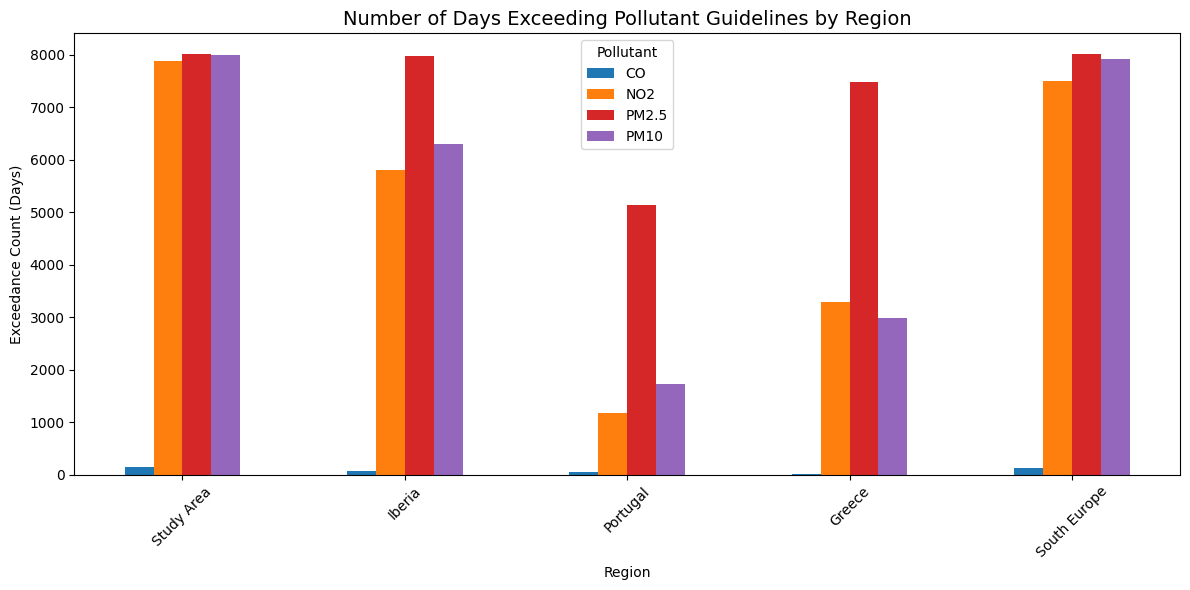

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Set up plot style
colors = {
    "CO": "tab:blue",
    "NO2": "tab:orange",
    "O3": "tab:green",
    "PM2.5": "tab:red",
    "PM10": "tab:purple"
}

# Melt the DataFrame to long format
df_melted = df.melt(id_vars="Region", var_name="Pollutant", value_name="Exceedance Count")

# Get unique regions and pollutants
regions = df["Region"].unique()
pollutants = df_melted["Pollutant"].unique()
n_pollutants = len(pollutants)

# Set bar width and positions
x = np.arange(len(regions))
bar_width = 0.13

# Plot
fig, ax = plt.subplots(figsize=(12, 6))

for i, pollutant in enumerate(pollutants):
    subset = df_melted[df_melted["Pollutant"] == pollutant]
    values = subset["Exceedance Count"].values
    ax.bar(x + i * bar_width, values, width=bar_width, label=pollutant, color=colors.get(pollutant, "gray"))

# Customize
ax.set_title("Number of Days Exceeding Pollutant Guidelines by Region", fontsize=14)
ax.set_ylabel("Exceedance Count (Days)")
ax.set_xlabel("Region")
ax.set_xticks(x + bar_width * (n_pollutants - 1) / 2)
ax.set_xticklabels(regions, rotation=45)
ax.legend(title="Pollutant")
plt.tight_layout()

# Show or save
plt.show()


Air quality

In [ ]:
#Days and no days that pollutant concentration exceed the WHO values